In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf

# Import our input dataset
Demo_CDC_df = pd.read_csv('https://ucbheartproject.s3.us-east-2.amazonaws.com/Demo_CDC_Stats_by_County.csv')
Demo_CDC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3226 entries, 0 to 3225
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   CensusTractName_x                             0 non-null      float64
 1   DisplayText_x                                 3226 non-null   object 
 2   Key                                           3226 non-null   int64  
 3   ParentText_x                                  3226 non-null   object 
 4   ThemeRangeId_x                                3226 non-null   int64  
 5   Percent of Black Population                   3226 non-null   float64
 6   Percent of Native American Population         3226 non-null   float64
 7   Percent of White Population                   3226 non-null   float64
 8   Percent of Hispanic/Latino Population         3226 non-null   float64
 9   Percent of Asian/Pacific Islander Population  3226 non-null   f

In [ ]:
Demo_CDC_df.head()

,CensusTractName_x,DisplayText_x,Key,ParentText_x,ThemeRangeId_x,Percent of Black Population,Percent of Native American Population,Percent of White Population,Percent of Hispanic/Latino Population,Percent of Asian/Pacific Islander Population,Percent of Retired Population
0,NaN,American Samoa,60000,AS,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,NaN,Guam,66010,GU,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,NaN,Mariana Islands,69000,MP,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,NaN,Saint Croix (County Equivalent),78010,VI,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,NaN,Saint John (County Equivalent),78020,VI,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [ ]:
Demo_CDC_df.columns

Index(['CensusTractName_x', 'DisplayText_x', 'Key', 'ParentText_x',
       'ThemeRangeId_x', 'Percent of Black Population',
       'Percent of Native American Population', 'Percent of White Population',
       'Percent of Hispanic/Latino Population',
       'Percent of Asian/Pacific Islander Population',
       'Percent of Retired Population'],
      dtype='object')

In [ ]:
#Demo_CDC_df.columns = Demo_CDC_df.columns.str.replace('_','')
Demo_CDC_rename_col = Demo_CDC_df.rename(columns={'CensusTractName_x':'CensusTractName_x', 'DisplayText_x':'DisplayText_x', 'Key':'Key', 'ParentText_x':'ParentText_x',
        'Percent of Black Population':'Percent_of_Black_Population',
       'Percent of Native American Population':'Percent_of_Native_American_Population','Percent of White Population':'Percent_of_White_Population',
       'Percent of Hispanic/Latino Population':'Percent_of_Hispanic_or_Latino_Population','Percent of Asian/Pacific Islander Population':'Percent_of_Asian_or_Pacific_Islander_Population',
       'Percent of Retired Population':'Percent_of_Retired_Population'},inplace = True)

In [ ]:
Demo_CDC_rename_col

In [ ]:
Demo_CDC_df.columns

Index(['CensusTractName_x', 'DisplayText_x', 'Key', 'ParentText_x',
       'ThemeRangeId_x', 'Percent_of_Black_Population',
       'Percent_of_Native_American_Population', 'Percent_of_White_Population',
       'Percent_of_Hispanic_or_Latino_Population',
       'Percent_of_Asian_or_Pacific_Islander_Population',
       'Percent_of_Retired_Population'],
      dtype='object')

In [ ]:
Demo_CDC_df.head()


,CensusTractName_x,DisplayText_x,Key,ParentText_x,ThemeRangeId_x,Percent_of_Black_Population,Percent_of_Native_American_Population,Percent_of_White_Population,Percent_of_Hispanic_or_Latino_Population,Percent_of_Asian_or_Pacific_Islander_Population,Percent_of_Retired_Population
0,NaN,American Samoa,60000,AS,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,NaN,Guam,66010,GU,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,NaN,Mariana Islands,69000,MP,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,NaN,Saint Croix (County Equivalent),78010,VI,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,NaN,Saint John (County Equivalent),78020,VI,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [ ]:
Demo_CDC_df.describe()

,CensusTractName_x,Key,ThemeRangeId_x,Percent_of_Black_Population,Percent_of_Native_American_Population,Percent_of_White_Population,Percent_of_Hispanic_or_Latino_Population,Percent_of_Asian_or_Pacific_Islander_Population,Percent_of_Retired_Population
count,0.0,3226.000000,3226.000000,3226.000000,3226.000000,3226.000000,3226.000000,3226.000000,3226.000000
mean,NaN,31468.220397,2.967142,8.640143,1.735462,74.474768,11.357967,1.353286,18.334191
std,NaN,16371.274194,1.439263,14.344975,7.458918,23.285517,19.361114,3.044012,4.617997
min,NaN,1001.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,NaN,19035.500000,2.000000,0.500000,0.100000,63.025000,2.100000,0.200000,15.500000
50%,NaN,30030.000000,3.000000,2.000000,0.200000,83.150000,4.200000,0.600000,18.000000
75%,NaN,46116.500000,4.000000,9.475000,0.600000,92.500000,10.200000,1.300000,20.800000
max,NaN,78030.000000,5.000000,87.400000,90.900000,100.000000,100.000000,53.300000,55.600000


Grouping the categrical value by ONEHOTSOUP ENCODER

In [ ]:
Demo_CDC_df.DisplayText_x .value_counts()


Washington         31
Jefferson          26
Franklin           24
Jackson            24
Lincoln            24
                   ..
Erath               1
Mariana Islands     1
Sequoyah            1
Haakon              1
Yancey              1
Name: DisplayText_x, Length: 1926, dtype: int64

In [ ]:
Demo_CDC_df.ParentText_x.value_counts()

TX    254
GA    159
VA    133
KY    120
MO    115
KS    105
IL    102
NC    100
IA     99
TN     95
NE     93
IN     92
OH     88
MN     87
MI     83
MS     82
PR     78
OK     77
AR     75
WI     72
PA     67
AL     67
FL     67
SD     66
LA     64
CO     64
NY     62
CA     58
MT     56
WV     55
ND     53
SC     46
ID     44
WA     39
OR     36
NM     33
AK     29
UT     29
MD     24
WY     23
NJ     21
NV     17
ME     16
AZ     15
MA     14
VT     14
NH     10
CT      8
HI      5
RI      5
VI      3
DE      3
GU      1
DC      1
AS      1
MP      1
Name: ParentText_x, dtype: int64

In [ ]:
Demo_CDC_df.CensusTractName_x .value_counts()

Series([], Name: CensusTractName_x, dtype: int64)

In [ ]:
Demo_CDC_df.Percent_of_Black_Population.value_counts()


0.0     259
0.4     117
0.3     115
0.5     115
0.2     114
       ... 
23.2      1
36.6      1
35.7      1
46.3      1
43.4      1
Name: Percent_of_Black_Population, Length: 484, dtype: int64

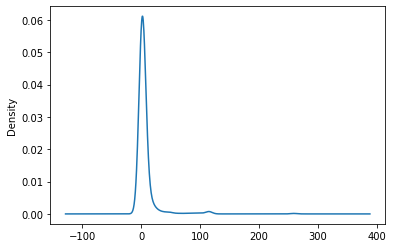

In [ ]:
Demo_CDC_df.Percent_of_Black_Population.value_counts().plot.density()

In [ ]:
Demo_CDC_df.Percent_of_Native_American_Population.value_counts()

0.0     717
0.1     553
0.2     474
0.3     299
0.4     197
       ... 
89.5      1
55.6      1
21.6      1
9.6       1
10.1      1
Name: Percent_of_Native_American_Population, Length: 189, dtype: int64

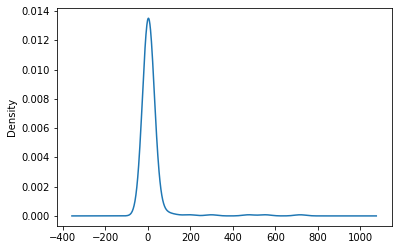

In [ ]:
Demo_CDC_df.Percent_of_Native_American_Population.value_counts().plot.density()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


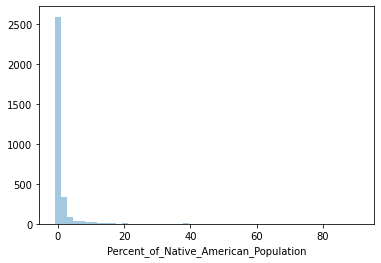

In [ ]:
import seaborn as sns
sns.distplot(Demo_CDC_df['Percent_of_Native_American_Population'],kde = False)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


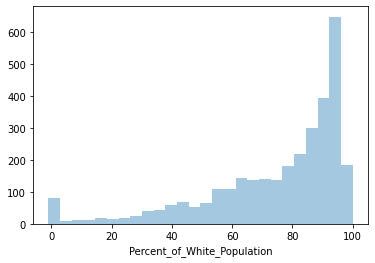

In [ ]:
sns.distplot(Demo_CDC_df['Percent_of_White_Population'],kde = False)

In [ ]:
Demo_CDC_df.Percent_of_White_Population.value_counts()

94.7    32
95.1    27
95.4    27
94.0    25
94.4    24
        ..
33.1     1
41.4     1
30.8     1
39.7     1
24.9     1
Name: Percent_of_White_Population, Length: 742, dtype: int64

In [ ]:
Demo_CDC_df.Percent_of_Hispanic_or_Latino_Population.value_counts()


1.5     78
1.7     62
2.0     61
2.2     59
2.9     58
        ..
41.9     1
49.8     1
18.2     1
95.4     1
29.4     1
Name: Percent_of_Hispanic_or_Latino_Population, Length: 468, dtype: int64

In [ ]:
Demo_CDC_df.Percent_of_Asian_or_Pacific_Islander_Population.value_counts()


0.0     441
0.4     253
0.3     251
0.5     234
0.1     199
       ... 
39.1      1
6.8       1
17.2      1
10.9      1
9.2       1
Name: Percent_of_Asian_or_Pacific_Islander_Population, Length: 134, dtype: int64

In [ ]:
Demo_CDC_df.Percent_of_Retired_Population.value_counts()

18.0    44
18.3    44
16.9    42
17.3    42
19.1    40
        ..
39.0     1
27.5     1
34.0     1
33.4     1
33.0     1
Name: Percent_of_Retired_Population, Length: 266, dtype: int64